# AutoRec cs3639 Recommendation Systems course IDC

### here will be general explanations

In [2]:
import numpy as np
import pandas as pd
import sklearn
import torch
from torch import nn

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


## datasets

In this project, we will use 2 datasets:
* **movielens**, which can be downloaded using `utils.datasets_download.py` or straight from [here](http://files.grouplens.org/datasets/movielens/).
* **netflixprize**, which can be downloaded from this [semi-parsed version from kaggle](https://www.kaggle.com/netflix-inc/netflix-prize-data) or from this [raw version](https://archive.org/download/nf_prize_dataset.tar)

**NOTE**: for the notebook to run properly, you should save you dataset under `data` folder and `movielens` folder for the movielens dataset and `netflix` folder for the netflixprize dataset.
i.e `data/movielens` folder and `data/netflix` folder respectively.

In [4]:
from src.mf.model import MatrixFactorization
from src.mf.training import MFTrainer

In [5]:
from src.data_prep import movielens_load
train, test = movielens_load(1)
print(train.shape)
train

(80000, 4)


,user_id,item_id,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
...,...,...,...,...
79995,943,1067,2,875501756
79996,943,1074,4,888640250
79997,943,1188,3,888640250
79998,943,1228,3,888640275


In [6]:
num_users = train.user_id.max()
num_items = train.item_id.max()
model = MatrixFactorization(num_users, num_items, k=80)
mf_trainer = MFTrainer(train, test, model, epochs=60, lr=0.002, reg=0.001, batch_size=128)
mf_trainer.train_model()

EPOCH 1: Avg losses: train: 6.947, val: 5.077
EPOCH 2: Avg losses: train: 4.347, val: 3.930
EPOCH 3: Avg losses: train: 3.685, val: 3.680
EPOCH 4: Avg losses: train: 3.505, val: 3.524
EPOCH 5: Avg losses: train: 3.247, val: 3.170
EPOCH 6: Avg losses: train: 2.704, val: 2.597
EPOCH 7: Avg losses: train: 2.251, val: 2.330
EPOCH 8: Avg losses: train: 2.115, val: 2.271
EPOCH 9: Avg losses: train: 2.094, val: 2.269
EPOCH 10: Avg losses: train: 2.092, val: 2.262
EPOCH 11: Avg losses: train: 2.089, val: 2.265
EPOCH 12: Avg losses: train: 2.094, val: 2.261
EPOCH 13: Avg losses: train: 2.088, val: 2.274
EPOCH 14: Avg losses: train: 2.093, val: 2.270
EPOCH 15: Avg losses: train: 2.094, val: 2.266
EPOCH 16: Avg losses: train: 2.094, val: 2.264
EPOCH 17: Avg losses: train: 2.092, val: 2.264
EPOCH 18: Avg losses: train: 2.092, val: 2.270
EPOCH 19: Avg losses: train: 2.092, val: 2.263
EPOCH 20: Avg losses: train: 2.094, val: 2.254
EPOCH 21: Avg losses: train: 2.088, val: 2.266
EPOCH 22: Avg losses: 

In [7]:
from utils.plots import plot_train_history

plot_train_history(mf_trainer.train_losses, mf_trainer.val_losses)

NameError: name 'np' is not defined

In [4]:
from src.data_prep import movielens_create_ratings
train, test = movielens_create_ratings(1)

In [5]:
from src.autorec.model import AutoRec
from src.autorec.training import AutoRecTrainer

In [6]:
num_users, num_items = train.shape
model = AutoRec(num_hidden=512, num_features=num_users)

EPOCH 1: Avg losses: train: 1.647, val: 1.098
EPOCH 2: Avg losses: train: 1.017, val: 0.980
EPOCH 3: Avg losses: train: 0.948, val: 0.970
EPOCH 4: Avg losses: train: 0.916, val: 0.926
EPOCH 5: Avg losses: train: 0.894, val: 0.918
EPOCH 6: Avg losses: train: 0.872, val: 0.900
EPOCH 7: Avg losses: train: 0.859, val: 0.887
EPOCH 8: Avg losses: train: 0.842, val: 0.887
EPOCH 9: Avg losses: train: 0.830, val: 0.864
EPOCH 10: Avg losses: train: 0.817, val: 0.861
EPOCH 11: Avg losses: train: 0.806, val: 0.862
EPOCH 12: Avg losses: train: 0.798, val: 0.852
EPOCH 13: Avg losses: train: 0.787, val: 0.847
EPOCH 14: Avg losses: train: 0.781, val: 0.844
EPOCH 15: Avg losses: train: 0.773, val: 0.857
EPOCH 16: Avg losses: train: 0.768, val: 0.834
EPOCH 17: Avg losses: train: 0.756, val: 0.833
EPOCH 18: Avg losses: train: 0.750, val: 0.810
EPOCH 19: Avg losses: train: 0.741, val: 0.817
EPOCH 20: Avg losses: train: 0.733, val: 0.824
EPOCH 21: Avg losses: train: 0.724, val: 0.824
EPOCH 22: Avg losses: 

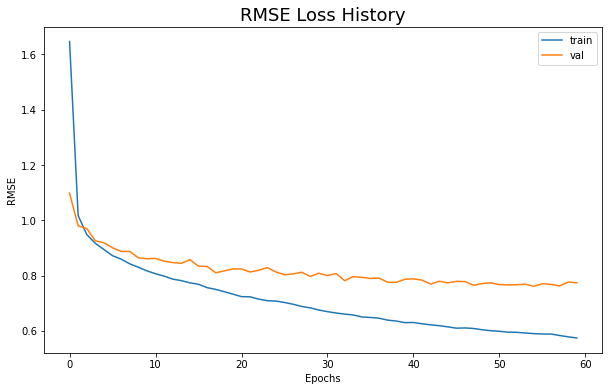

In [7]:
from utils.plots import plot_train_history
autorec_trainer = AutoRecTrainer(train, test, model, epochs=60, batch_size=64, lr=0.001, reg=0.001)
autorec_trainer.train_model()
plot_train_history(autorec_trainer.train_losses, autorec_trainer.val_losses)